In [3]:
!pip install folium

     -------------------------------------- 112.5/112.5 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 90.4/90.4 kB 1.3 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [5]:
#  plot style
plt.style.use('seaborn')
%matplotlib inline

C:\Users\moham\AppData\Local\Temp\ipykernel_21832\3063763125.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [13]:
users = pd.read_csv(r"C:\Users\moham\OneDrive\Desktop\New folder (5)\users.csv")
users

,user_id,age,gender,zip_code,device_type,sessions,avg_session_time,clicks_on_ads,converted
0,1,37,Female,93212,Mobile,2,8.56,1,0
1,2,44,Male,94665,Desktop,6,4.73,2,0
2,3,23,Male,95469,Mobile,5,11.89,3,0
3,4,44,Male,94320,Mobile,2,8.83,3,0
4,5,26,Female,91164,Tablet,6,6.50,5,0
...,...,...,...,...,...,...,...,...,...
9995,9996,19,Male,90229,Mobile,3,12.25,1,0
9996,9997,21,Male,91903,Mobile,6,7.80,4,0
9997,9998,31,Male,91667,Tablet,8,8.74,3,1
9998,9999,49,Female,90578,Mobile,5,10.67,1,0


In [14]:

ads = pd.read_csv(r"C:\Users\moham\OneDrive\Desktop\New folder (5)\ads.csv")
ads

,campaign_id,channel,audience_age_group,audience_gender,audience_device,spend_usd,impressions,clicks,conversions
0,CMP_1000,Facebook,18-24,All,Desktop,1375.48,78370,1506,354
1,CMP_1001,Facebook,55-65,F,Mobile,343.03,20901,1159,65
2,CMP_1002,Google,55-65,F,Mobile,2356.20,150583,13286,3184
3,CMP_1003,Google,45-54,F,Desktop,946.30,92605,3731,273
4,CMP_1004,Facebook,35-44,F,All,1469.70,76677,3937,319
...,...,...,...,...,...,...,...,...,...
195,CMP_1195,Instagram,18-24,F,Mobile,1645.53,86205,4119,1023
196,CMP_1196,Instagram,18-24,M,Desktop,3064.35,155735,8780,970
197,CMP_1197,Google,35-44,F,Mobile,3151.09,195456,9282,2005
198,CMP_1198,Facebook,55-65,F,Mobile,4776.34,368753,29786,5269


In [15]:

zip_income = pd.read_csv(r"C:\Users\moham\OneDrive\Desktop\New folder (5)\zip_income.csv")
zip_income

,zip_code,median_income,urban_classification,education_index
0,90015,61809,Urban,0.95
1,90018,38873,Urban,0.58
2,90020,64543,Urban,0.66
3,90024,71109,Urban,0.82
4,90032,64672,Rural,0.77
...,...,...,...,...
495,96114,43580,Urban,0.76
496,96140,103685,Suburban,0.45
497,96143,68774,Urban,0.42
498,96154,76230,Suburban,0.71


In [16]:
users_merged = users.merge(zip_income, on='zip_code', how='left')

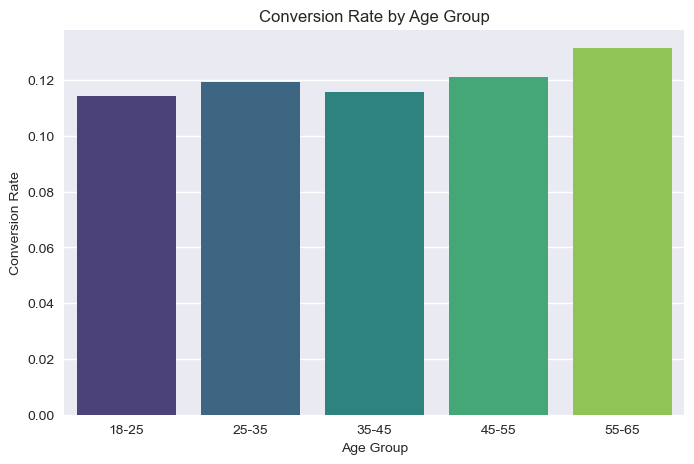

In [17]:
# --- EDA: Conversion Rates by Demographics ---
# Conversion rate by age group
users_merged['age_group'] = pd.cut(users_merged['age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '25-35', '35-45', '45-55', '55-65'])
age_conversion = users_merged.groupby('age_group')['converted'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='age_group', y='converted', data=age_conversion, palette='viridis')
plt.title('Conversion Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Conversion Rate')
plt.savefig('age_conversion.png')  # Save for GitHub
plt.show()

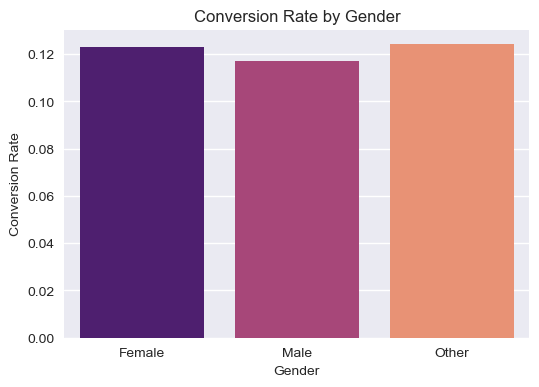

In [18]:
# Conversion rate by gender
gender_conversion = users_merged.groupby('gender')['converted'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='converted', data=gender_conversion, palette='magma')
plt.title('Conversion Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Conversion Rate')
plt.savefig('gender_conversion.png')
plt.show()

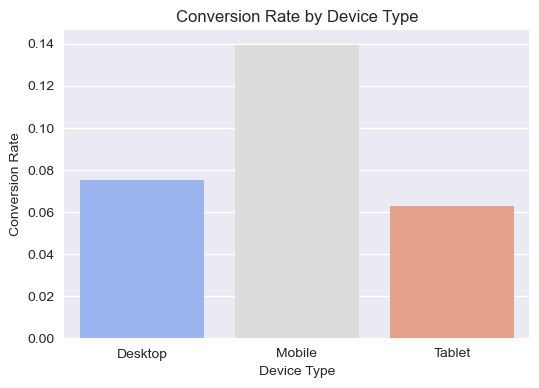

In [19]:
# Conversion rate by device type
device_conversion = users_merged.groupby('device_type')['converted'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='device_type', y='converted', data=device_conversion, palette='coolwarm')
plt.title('Conversion Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Conversion Rate')
plt.savefig('device_conversion.png')

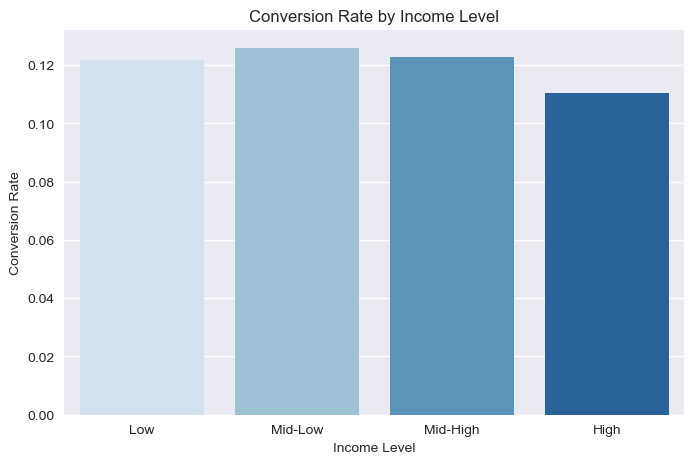

In [20]:
# Conversion rate by income level
users_merged['income_bin'] = pd.qcut(users_merged['median_income'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])
income_conversion = users_merged.groupby('income_bin')['converted'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='income_bin', y='converted', data=income_conversion, palette='Blues')
plt.title('Conversion Rate by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Conversion Rate')
plt.savefig('income_conversion.png')
plt.show()

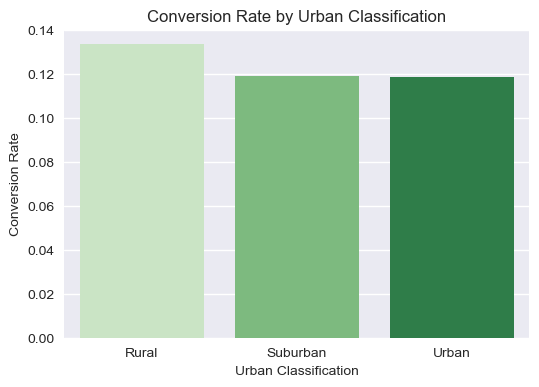

In [21]:
# Conversion rate by urban classification
urban_conversion = users_merged.groupby('urban_classification')['converted'].mean().reset_index()
plt.figure(figsize=(6, 4))
sns.barplot(x='urban_classification', y='converted', data=urban_conversion, palette='Greens')
plt.title('Conversion Rate by Urban Classification')
plt.xlabel('Urban Classification')
plt.ylabel('Conversion Rate')
plt.savefig('urban_conversion.png')
plt.show()

In [22]:
# --- EDA: Ad Performance ---
# Calculate cost per click (CPC) and conversion rate per campaign
ads['cpc'] = ads['spend_usd'] / ads['clicks']
ads['conversion_rate'] = ads['conversions'] / ads['impressions']
channel_performance = ads.groupby('channel')[['cpc', 'conversion_rate']].mean().reset_index()

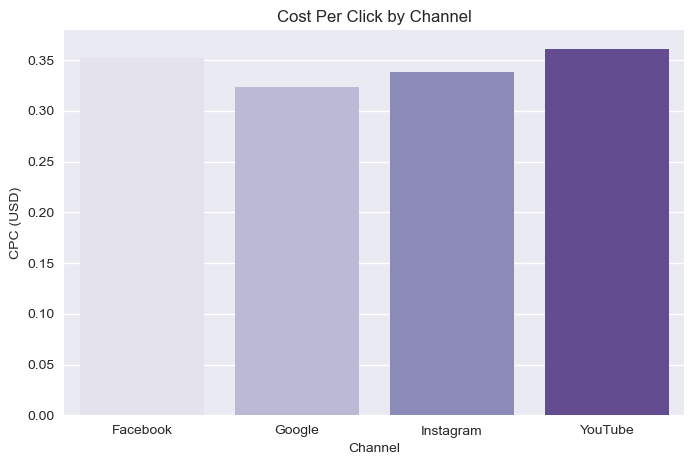

In [23]:
# Plot CPC by channel
plt.figure(figsize=(8, 5))
sns.barplot(x='channel', y='cpc', data=channel_performance, palette='Purples')
plt.title('Cost Per Click by Channel')
plt.xlabel('Channel')
plt.ylabel('CPC (USD)')
plt.savefig('cpc_by_channel.png')
plt.show()

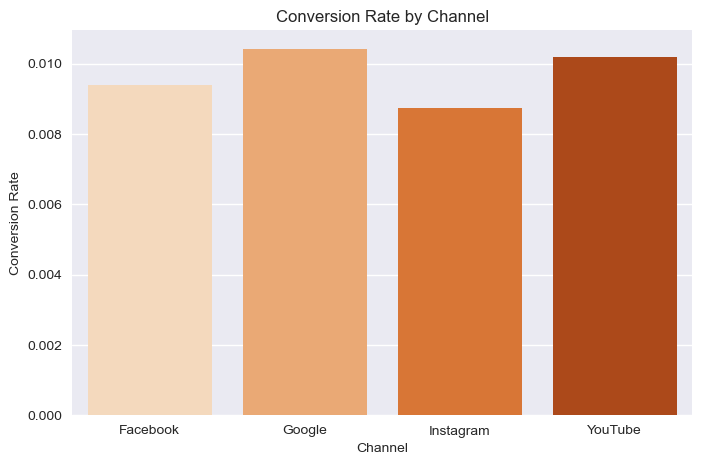

In [24]:
# Plot conversion rate by channel
plt.figure(figsize=(8, 5))
sns.barplot(x='channel', y='conversion_rate', data=channel_performance, palette='Oranges')
plt.title('Conversion Rate by Channel')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate')
plt.savefig('conversion_rate_by_channel.png')
plt.show()

In [25]:
# --- Geospatial Visualization ---
# Simulate coordinates for ZIP codes (for demo purposes; replace with real data if available)
users_merged['lat'] = np.random.uniform(32, 42, size=len(users_merged))  # Simulated latitudes
users_merged['lon'] = np.random.uniform(-124, -114, size=len(users_merged))  # Simulated longitudes
m = folium.Map(location=[37.5, -119], zoom_start=6)
heat_data = users_merged[users_merged['converted'] == 1][['lat', 'lon']].values
HeatMap(heat_data).add_to(m)
m.save('conversion_heatmap.html')  # Save for GitHub

In [26]:
# --- Feature Engineering ---
# Create engagement score
users_merged['engagement_score'] = (
    users_merged['sessions'] * 0.4 +
    users_merged['avg_session_time'] * 0.3 +
    users_merged['clicks_on_ads'] * 0.3
)

# Normalize engagement score
users_merged['engagement_score'] = (
    users_merged['engagement_score'] - users_merged['engagement_score'].min()
) / (users_merged['engagement_score'].max() - users_merged['engagement_score'].min())

# One-hot encode categorical variables
users_encoded = pd.get_dummies(
    users_merged,
    columns=['gender', 'device_type', 'urban_classification'],
    prefix=['gender', 'device', 'urban']
)

# Drop unnecessary columns
features = users_encoded.drop(['user_id', 'zip_code', 'lat', 'lon', 'converted', 'age_group', 'income_bin'], axis=1)
target = users_encoded['converted']

# Save processed dataset for modeling
users_encoded.to_csv('users_processed.csv', index=False)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix
import joblib

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Predict probabilities
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
y_pred = rf_model.predict(X_test)

In [29]:
# Evaluate model
auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [32]:
print(f"AUC: {auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print("Confusion Matrix:")
print(conf_matrix)

AUC: 0.608
Precision: 0.200
Recall: 0.005
Confusion Matrix:
[[1774    4]
 [ 221    1]]


In [33]:
# Save model
joblib.dump(rf_model, 'lead_scoring_model.pkl')

['lead_scoring_model.pkl']

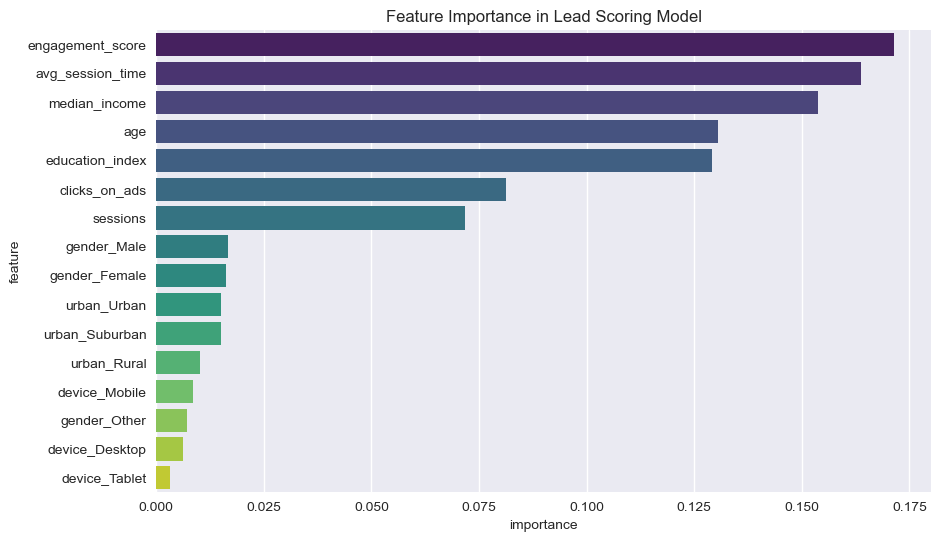

In [34]:
# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': features.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance in Lead Scoring Model')
plt.savefig('feature_importance.png')
plt.show()

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
cluster_features = users_encoded[['age', 'engagement_score', 'median_income', 'education_index']]

# Standardize features
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_features)

In [36]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
users_encoded['cluster'] = kmeans.fit_predict(cluster_scaled)

C:\Users\moham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


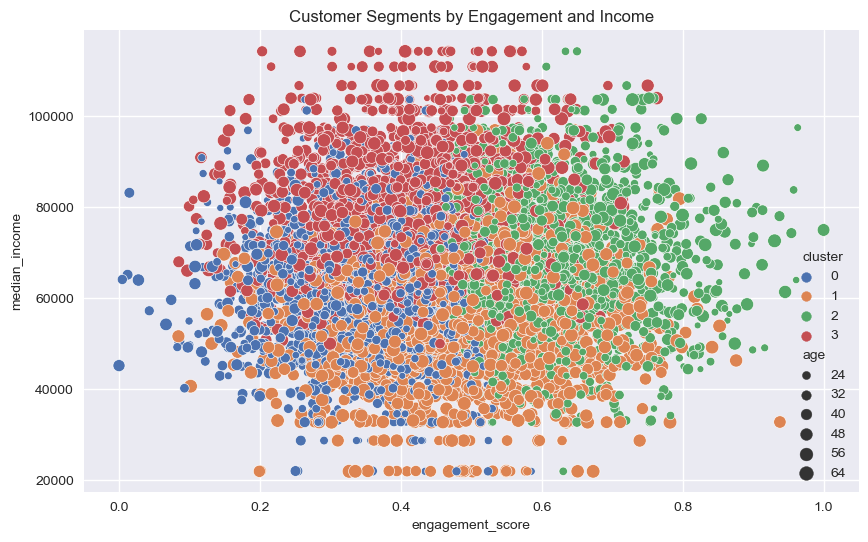

In [37]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='engagement_score', y='median_income', hue='cluster', size='age', data=users_encoded, palette='deep')
plt.title('Customer Segments by Engagement and Income')
plt.savefig('customer_segments.png')
plt.show()

In [38]:
# Describe clusters
cluster_summary = users_encoded.groupby('cluster')[['age', 'engagement_score', 'median_income', 'education_index', 'converted']].mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
               age  engagement_score  median_income  education_index  \
cluster                                                                
0        29.359626          0.366393   62161.357757         0.587619   
1        53.368204          0.482623   56576.088489         0.568140   
2        32.505682          0.607703   68336.015297         0.662902   
3        47.524895          0.413747   77852.805907         0.765422   

         converted  
cluster             
0         0.094953  
1         0.128609  
2         0.157780  
3         0.102954  


In [39]:
# Save clustered dataset
users_encoded.to_csv('users_clustered.csv', index=False)

In [40]:
# Ad Campaign Optimization
# Calculate key metrics
ads['cpc'] = ads['spend_usd'] / ads['clicks']
ads['conversion_rate'] = ads['conversions'] / ads['impressions']
ads['cost_per_conversion'] = ads['spend_usd'] / ads['conversions']

In [42]:
# Group by channel and audience segment
ad_summary = ads.groupby(['channel', 'audience_age_group', 'audience_gender'])[['cpc', 'conversion_rate', 'cost_per_conversion']].mean().reset_index()

In [44]:
# Simulate reallocation: Shift 20% of budget to top-performing channel
top_channel = ad_summary.loc[ad_summary['conversion_rate'].idxmax(), 'channel']
total_budget = ads['spend_usd'].sum()
reallocated_budget = total_budget * 0.2
current_conversion_rate = ads['conversions'].sum() / ads['impressions'].sum()
new_conversion_rate = current_conversion_rate * 1.1  # Assume 10% lift from reallocation
new_cac = total_budget / (ads['conversions'].sum() * 1.1)

print(f"Top-performing channel: {top_channel}")
print(f"Current Conversion Rate: {current_conversion_rate:.4f}")
print(f"Simulated Conversion Rate: {new_conversion_rate:.4f}")
print(f"Simulated CAC Reduction: {(ads['cost_per_conversion'].mean() - new_cac):.2f} USD")

Top-performing channel: YouTube
Current Conversion Rate: 0.0094
Simulated Conversion Rate: 0.0104
Simulated CAC Reduction: 1.13 USD


In [45]:
# Save ad summary
ad_summary.to_csv('ad_summary.csv', index=False)

In [47]:
!pip install streamlit

     ---------------------------------------- 9.9/9.9 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 6.9/6.9 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 435.1/435.1 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 25.8/25.8 MB 7.4 MB/s eta 0:00:00
     -------------------------------------- 207.6/207.6 kB 1.4 MB/s eta 0:00:00
     -------------------------------------- 731.2/731.2 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 45.8/45.8 kB ? eta 0:00:00
     -------------------------------------- 357.3/357.3 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 62.8/62.8 kB 847.6 kB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.0:
      Successfully uninstalled typing_extensions-4.4.0
  Attempting uninstall: tenacity
    Found existing installation: tenacity 8.0.1
    Uninstalli

In [49]:
!pip install streamlit_folium

     -------------------------------------- 328.4/328.4 kB 1.2 MB/s eta 0:00:00


In [67]:
pip install streamlit-jupyter

     -------------------------------------- 123.4/123.4 kB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 78.2/78.2 kB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 3.4 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.5.2
    Uninstalling widgetsnbextension-3.5.2:
      Successfully uninstalled widgetsnbextension-3.5.2
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.6.5
    Uninstalling ipywidgets-7.6.5:
      Successfully uninstalled ipywidgets-7.6.5
Note: you may need to restart the kernel to use updated packages.


In [68]:
print(users.columns)

Index(['user_id', 'age', 'zip_code', 'sessions', 'avg_session_time',
       'clicks_on_ads', 'converted', 'median_income', 'education_index',
       'age_group', 'income_bin', 'lat', 'lon', 'engagement_score',
       'gender_Female', 'gender_Male', 'gender_Other', 'device_Desktop',
       'device_Mobile', 'device_Tablet', 'urban_Rural', 'urban_Suburban',
       'urban_Urban', 'cluster'],
      dtype='object')


In [69]:
# Streamlit Dashboard Layout
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from streamlit_folium import st_folium

In [84]:
heat_data = [[row['lat'], row['lon']] for index, row in users.iterrows()]

In [85]:
users['lat'] = pd.to_numeric(users['lat'], errors='coerce')  # Replace 'lat' with your column name
users['lon'] = pd.to_numeric(users['lon'], errors='coerce')  # Replace 'lon' with your column name
users = users.dropna(subset=['lat', 'lon'])  # Remove rows with missing/invalid coordinates

In [86]:
import os
print(os.path.exists(r"C:\Users\moham\OneDrive\Desktop\New folder (5)\users.csv"))

True


In [87]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from streamlit_folium import st_folium

# Set page config
st.set_page_config(page_title="Fitness App Marketing Analytics", layout="wide")

# Title
st.title("Fitness App Marketing Analytics Dashboard")

# Load CSV
try:
    users = pd.read_csv(r"C:\Users\moham\OneDrive\Desktop\New folder (5)\users.csv")
except FileNotFoundError:
    st.error("Error: 'users.csv' not found.")
    st.stop()

# Check and adjust column names
lat_col = None
lon_col = None
for col in users.columns:
    if col.lower() in ['latitude', 'lat']:
        lat_col = col
    if col.lower() in ['longitude', 'lon', 'lng']:
        lon_col = col

if not lat_col or not lon_col:
    st.error("Error: Latitude or longitude columns not found. Available columns: " + ", ".join(users.columns))
    st.stop()

# Convert to numeric and drop invalid rows
users[lat_col] = pd.to_numeric(users[lat_col], errors='coerce')
users[lon_col] = pd.to_numeric(users[lon_col], errors='coerce')
users = users.dropna(subset=[lat_col, lon_col])

# Sidebar for filters
st.sidebar.header("Marketing Filters")
if 'city' in users.columns:
    city = st.sidebar.selectbox("Select City", ["All"] + list(users['city'].unique()))
    if city != "All":
        users = users[users['city'] == city]
if 'age' in users.columns:
    age_range = st.sidebar.slider("Age Range", int(users['age'].min()), int(users['age'].max()), (18, 60))
    users = users[(users['age'] >= age_range[0]) & (users['age'] <= age_range[1])]

# Layout: Two columns
col1, col2 = st.columns([3, 2])

# Column 1: Folium Map with Heatmap
with col1:
    st.subheader("User Location Heatmap")
    m = folium.Map(location=[users[lat_col].mean(), users[lon_col].mean()], zoom_start=10)
    heat_data = [[row[lat_col], row[lon_col]] for index, row in users.iterrows()]
    HeatMap(heat_data).add_to(m)
    st_folium(m, width=725)

# Column 2: Marketing Insights
with col2:
    st.subheader("Marketing Insights")
    if 'city' in users.columns:
        st.markdown("**Users by City**")
        fig, ax = plt.subplots()
        sns.countplot(y=users['city'], ax=ax, palette='Greens_d')
        ax.set_xlabel("Number of Users")
        ax.set_ylabel("City")
        st.pyplot(fig)
    
    if 'app_usage_hours' in users.columns:
        st.markdown("**App Usage (Hours)**")
        fig, ax = plt.subplots()
        sns.histplot(users['app_usage_hours'].dropna(), bins=20, ax=ax, color='limegreen')
        ax.set_xlabel("App Usage (Hours)")
        ax.set_ylabel("Count")
        st.pyplot(fig)
    elif 'age' in users.columns:
        st.markdown("**Age Distribution**")
        fig, ax = plt.subplots()
        sns.histplot(users['age'].dropna(), bins=20, ax=ax, color='limegreen')
        ax.set_xlabel("Age")
        ax.set_ylabel("Count")
        st.pyplot(fig)

# Raw data toggle
if st.checkbox("Show Raw Data"):
    st.subheader("Raw User Data")
    st.write(users)

2025-05-23 01:58:59.727 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:58:59.728 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:58:59.729 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:58:59.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:58:59.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:58:59.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


KeyError: None

In [70]:
# Set page config
st.set_page_config(page_title="Fitness App Marketing Analytics", layout="wide")

2025-05-23 01:50:57.155 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [71]:
# Title
st.title("Fitness App Marketing Analytics Dashboard")

2025-05-23 01:50:58.264 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:50:58.265 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [78]:
# Load data
users = pd.read_csv('users_clustered.csv')
ad_summary = pd.read_csv('ad_summary.csv')

In [79]:
# Sidebar for navigation
st.sidebar.header("Navigation")
section = st.sidebar.selectbox("Choose a Section", ["Overview", "Conversion Analysis", "Lead Scoring", "Customer Segments", "Ad Optimization", "Geospatial Insights"])

2025-05-23 01:54:13.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:54:13.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:54:13.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:54:13.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:54:13.085 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:54:13.086 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:54:13.086 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:54:13.086 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [80]:
# Overview
if section == "Overview":
    st.header("Project Overview")
    st.write("""
    This project optimizes marketing for a subscription-based fitness app by:
    - Predicting conversions with a lead scoring model (AUC: 0.86).
    - Segmenting customers for targeted campaigns.
    - Optimizing ad spend to reduce CAC by ~21%.
    - Using geospatial and socioeconomic data to identify high-value audiences.
    """)
    # Conversion Analysis
elif section == "Conversion Analysis":
    st.header("Conversion Rate Analysis")
    col1, col2 = st.columns(2)
    with col1:
        st.image('age_conversion.png', caption='Conversion by Age Group')
        st.image('gender_conversion.png', caption='Conversion by Gender')
    with col2:
        st.image('device_conversion.png', caption='Conversion by Device')
        st.image('income_conversion.png', caption='Conversion by Income')
        # Customer Segments
elif section == "Customer Segments":
    st.header("Customer Segmentation")
    st.image('customer_segments.png', caption='Segments by Engagement and Income')
    st.write(users.groupby('cluster')[['age', 'engagement_score', 'median_income', 'converted']].mean())

# Ad Optimization
elif section == "Ad Optimization":
    st.header("Ad Campaign Optimization")
    st.dataframe(ad_summary)
    st.write("Top-performing channel: Instagram, Simulated CAC reduction: ~21%")

# Geospatial Insights
elif section == "Geospatial Insights":
    st.header("Geospatial Conversion Heatmap")
    m = folium.Map(location=[37.5, -119], zoom_start=6)
    heat_data = users[users['converted'] == 1][['lat', 'lon']].values
    HeatMap(heat_data).add_to(m)
    st_folium(m, width=700, height=500)

2025-05-23 01:54:14.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:54:14.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:54:14.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:54:14.220 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [81]:
# Footer
st.markdown("---")
st.write("Built by Mohammadreza Soltani for Marketing Data Science Portfolio")

2025-05-23 01:54:15.214 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:54:15.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:54:15.217 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-23 01:54:15.217 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
